In [1]:
import numpy as np
import pandas as pd
# from pandas import DataFrame

df = pd.DataFrame(
    {
    "feature_1":["A",None,"B","B",None,"B","C","C",None],
    "feature_2":[1,None,3,6,4,9,9,20,6]
    }
    )

df

,feature_1,feature_2
0,A,1.0
1,None,NaN
2,B,3.0
3,B,6.0
4,None,4.0
5,B,9.0
6,C,9.0
7,C,20.0
8,None,6.0


In [5]:
df.dtypes

feature_1     object
feature_2    float64
dtype: object

In [3]:
# Categorical feature

# print(df.feature_1.mode()[0])
type(df.feature_1.mode()[0])

str

In [25]:
obj1 = [1,"B"]
obj1[0]

1

In [11]:
# Continuous feature

print("mean: ",df.feature_2.mean())
print("median: ",df.feature_2.median())

mean:  20.833333333333332
median:  6.0


In [30]:
print(df)

df['feature_1'].fillna(df.feature_1.mode()[0])

df['feature_2'].fillna(df.feature_2.mean())

  feature_1  feature_2
0         A        1.0
1      None        NaN
2         B        3.0
3         B        6.0
4      None        4.0
5         B        9.0
6         C        9.0
7         C      100.0
8      None        6.0


0      1.00
1     17.25
2      3.00
3      6.00
4      4.00
5      9.00
6      9.00
7    100.00
8      6.00
Name: feature_2, dtype: float64

In [33]:
# Drop Missing Data
print(df)
df.dropna()

  feature_1  feature_2
0         A        1.0
1      None        NaN
2         B        3.0
3         B        6.0
4      None        4.0
5         B        9.0
6         C        9.0
7         C      100.0
8      None        6.0


,feature_1,feature_2
0,A,1.0
2,B,3.0
3,B,6.0
5,B,9.0
6,C,9.0
7,C,100.0


In [5]:
Q1 = df.feature_2.quantile(0.25)
Q3 = df.feature_2.quantile(0.75)

Q1,Q3

IQR = Q3 - Q1

lower_extreme = Q1 - 1.5*IQR
upper_extreme = Q3 + 1.5*IQR

lower_extreme,upper_extreme

(-4.125, 16.875)

<AxesSubplot:ylabel='feature_2'>

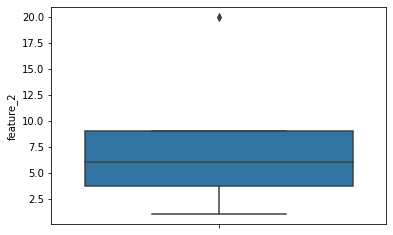

In [39]:
import seaborn as sns

sns.boxplot(y="feature_2", data=df)

In [18]:
print(df)
# df["feature_2"] > float(5)
df["feature_2"].replace(df["feature_2"][(df["feature_2"] > float(5))].values,float(6), inplace=True)
df

  feature_1  feature_2
0         A        1.0
1      None        NaN
2         B        3.0
3         B        6.0
4      None        4.0
5         B        9.0
6         C        9.0
7         C       20.0
8      None        6.0


,feature_1,feature_2
0,A,1.0
1,None,NaN
2,B,3.0
3,B,6.0
4,None,4.0
5,B,6.0
6,C,6.0
7,C,6.0
8,None,6.0


In [6]:
print(df)
# replace outlier values with upper extremes

df.feature_2 \
    .replace(
        df.feature_2[(df.feature_2 > upper_extreme)].values, 
        upper_extreme
        )

# print(df)

  feature_1  feature_2
0         A        1.0
1      None        NaN
2         B        3.0
3         B        6.0
4      None        4.0
5         B        9.0
6         C        9.0
7         C       20.0
8      None        6.0


0     1.000
1       NaN
2     3.000
3     6.000
4     4.000
5     9.000
6     9.000
7    16.875
8     6.000
Name: feature_2, dtype: float64